Saving image.png to image (1).png
Image shape: (512, 512)


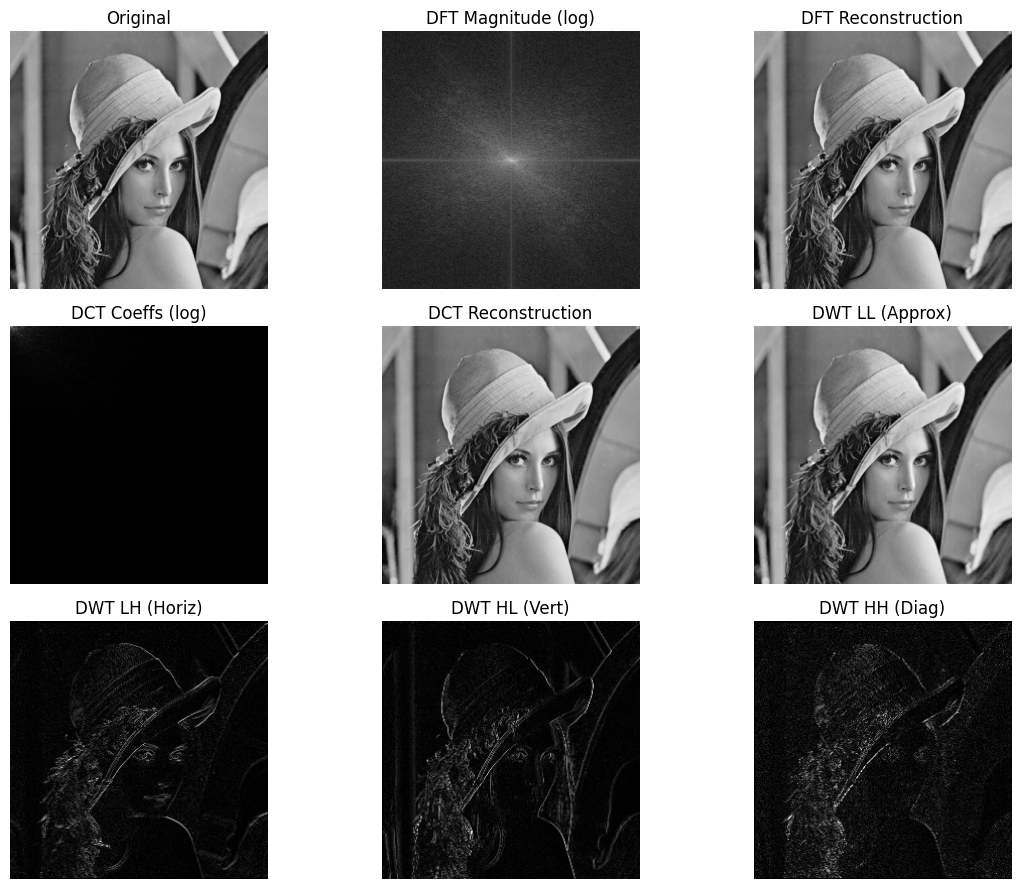

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
from scipy.fftpack import dct, idct

# ===== Colab image upload (correct minimal) =====
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 1) DFT implementation
def dft2(img):
    """2D Discrete Fourier Transform"""
    return np.fft.fft2(img)

def idft2(F):
    """Inverse 2D DFT"""
    img_rec = np.fft.ifft2(F)
    img_rec = np.real(img_rec)
    img_rec = np.clip(img_rec, 0.0, 1.0)
    return img_rec

def dft_magnitude_spectrum(F):
    F_shift = np.fft.fftshift(F)
    mag = np.log(1 + np.abs(F_shift))
    return mag

# 2) DCT implementation
def dct2(img):
    """2D Discrete Cosine Transform (DCT-II, orthonormal)"""
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

def idct2(A):
    """Inverse 2D DCT"""
    return idct(idct(A.T, norm='ortho').T, norm='ortho')

# 3) DWT implementation
def dwt2(img, wavelet='haar'):
    """
    Single-level 2D Discrete Wavelet Transform.
    Returns: LL, (LH, HL, HH)
    """
    coeffs2 = pywt.dwt2(img, wavelet)
    return coeffs2  # (LL, (LH, HL, HH))

def idwt2(coeffs2, wavelet='haar'):
    """Inverse 2D DWT"""
    img_rec = pywt.idwt2(coeffs2, wavelet)
    img_rec = np.clip(img_rec, 0.0, 1.0)
    return img_rec




# ---- Load uploaded image with OpenCV ----
img_cv = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


img = img_cv.astype(np.float32) / 255.0  # normalize to [0,1]
print("Image shape:", img.shape)

# A) DFT
F = dft2(img)
mag_dft = dft_magnitude_spectrum(F)
img_dft_rec = idft2(F)

# B) DCT
A = dct2(img)
dct_mag = np.log(1 + np.abs(A))
img_dct_rec = idct2(A)
img_dct_rec = np.clip(img_dct_rec, 0.0, 1.0)

# C) DWT
coeffs2 = dwt2(img, wavelet='haar')
LL, (LH, HL, HH) = coeffs2
img_dwt_rec = idwt2(coeffs2, wavelet='haar')

# Visualization
plt.figure(figsize=(12, 9))

# Original
plt.subplot(3, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

# DFT magnitude
plt.subplot(3, 3, 2)
plt.imshow(mag_dft, cmap="gray")
plt.title("DFT Magnitude (log)")
plt.axis("off")

# DFT reconstruction
plt.subplot(3, 3, 3)
plt.imshow(img_dft_rec, cmap="gray")
plt.title("DFT Reconstruction")
plt.axis("off")

# DCT magnitude
plt.subplot(3, 3, 4)
plt.imshow(dct_mag, cmap="gray")
plt.title("DCT Coeffs (log)")
plt.axis("off")

# DCT reconstruction
plt.subplot(3, 3, 5)
plt.imshow(img_dct_rec, cmap="gray")
plt.title("DCT Reconstruction")
plt.axis("off")

# DWT LL (approximation)
plt.subplot(3, 3, 6)
plt.imshow(LL, cmap="gray")
plt.title("DWT LL (Approx)")
plt.axis("off")

# DWT LH / HL / HH (details)
plt.subplot(3, 3, 7)
plt.imshow(np.abs(LH), cmap="gray")
plt.title("DWT LH (Horiz)")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(np.abs(HL), cmap="gray")
plt.title("DWT HL (Vert)")
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(np.abs(HH), cmap="gray")
plt.title("DWT HH (Diag)")
plt.axis("off")

plt.tight_layout()
plt.show()
